https://www.sciencedirect.com/science/article/pii/S0898122112001745#br000150

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import math
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 1. Importing the dataset

## Data Sources:

The data is stored in data directory, containing 7 files as mentioned below:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming. See: https://psl.noaa.gov/data/timeseries/AMO/
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland, see: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table
 - spot_num.txt: The number of sun spots, see http://www.sidc.be/silso/datafiles
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979, see: https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices
 - temp.csv: global average temperature by year, see: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
 - volcano.csv: volcanic activities, see:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland
 - spot_num.txt: The number of sun spots
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979
 - temp.csv: global average temperature by year
 - volcano.csv: volcanic activities

## Read temperature data

<AxesSubplot:xlabel='date'>

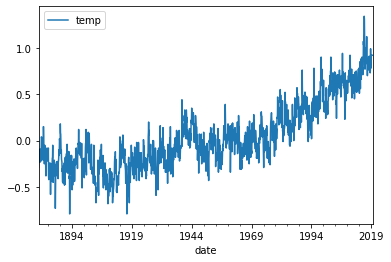

In [2]:
df_temp = pd.read_csv("data/global_surface_temperature_anomalies.csv")
df_temp['date'] = pd.to_datetime(df_temp['date'])
#df_temp.set_index('date', inplace=True)
df_temp["year"] = df_temp.date.dt.year
df_temp["month"] = df_temp.date.dt.month
df_temp['date'] = pd.to_datetime(df_temp['year'].astype(str) + '-' + df_temp['month'].astype(str))
df_temp.set_index('date', inplace=True)
df_temp = df_temp.rename(columns={"Avg_Anomaly_deg_C":"temp"})
df_temp = df_temp[["temp"]]
df_temp.dropna()
df_temp.plot()

## Read AMO data

<AxesSubplot:xlabel='date'>

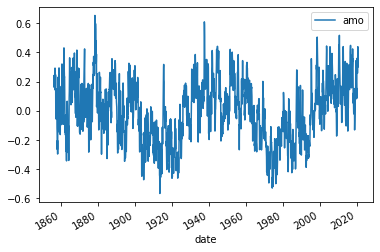

In [3]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_amo = pd.read_csv("data/amo.txt",sep="   ",index_col=0, names = col_month) # 3 spaces
df_amo.reset_index(inplace=True)
df_amo.rename(columns={'index': 'year'}, inplace=True)
df_amo = df_amo.melt(id_vars='year', var_name='month')
df_amo['date'] = pd.to_datetime(df_amo['year'].astype(str) + '-' + df_amo['month'])
df_amo.set_index('date', inplace=True)
df_amo["value"] = pd.to_numeric(df_amo["value"],errors="coerce")
df_amo = df_amo.rename(columns={"value":"amo"})
df_amo = df_amo[["amo"]]
df_amo.dropna()
df_amo.sort_index()
df_amo.plot()

## Read CO2 data

<AxesSubplot:xlabel='date'>

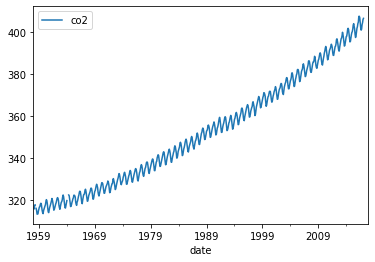

In [4]:
df_co2 = pd.read_csv("data/co2.csv")
df_co2["date"] = pd.to_datetime(df_co2["Year"].astype(str) + "-" + df_co2["Month"].astype(str))
df_co2.set_index("date", inplace=True)
df_co2 = df_co2.rename(columns={"Carbon Dioxide (ppm)":"co2"})
df_co2.co2 = pd.to_numeric(df_co2.co2)
df_co2 = df_co2[["co2"]]
df_co2.dropna()
df_co2.plot()

## Read NAO data

<AxesSubplot:xlabel='date'>

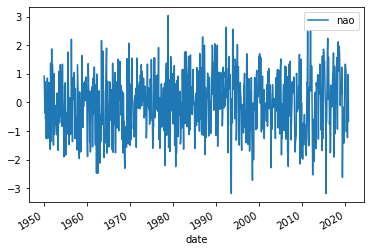

In [5]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_nao = pd.read_csv("data/nao.txt",sep="  ",index_col=0, names = col_month) # 2 spaces
df_nao.reset_index(inplace=True)
df_nao.rename(columns={'index': 'year'}, inplace=True)
df_nao = df_nao.melt(id_vars='year', var_name='month')
df_nao['date'] = pd.to_datetime(df_nao['year'].astype(str) + '-' + df_nao['month'])
df_nao.set_index('date', inplace=True)
df_nao["value"] = pd.to_numeric(df_nao["value"],errors="coerce")
df_nao = df_nao.rename(columns={"value":"nao"})
df_nao = df_nao[["nao"]]
df_nao.dropna()
df_nao.sort_index()
df_nao.plot()

## Read Sun Spot Data

<AxesSubplot:xlabel='date'>

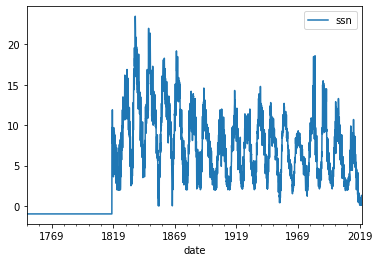

In [6]:
df_ssn = pd.read_csv("data/SN_m_tot_V2.0.csv",sep=";", index_col=2,names=["YEAR","MON","ir1","ssn","ir2","ir3"])
df_ssn["date"] = pd.to_datetime(df_ssn.YEAR.astype("str")+'-'+df_ssn.MON.astype(str))
df_ssn.set_index('date', inplace=True)
df_ssn.rename(columns={'SSN': 'ssn'}, inplace=True)
df_ssn["ssn"] = pd.to_numeric(df_ssn["ssn"],errors="coerce")
df_ssn = df_ssn[["ssn"]]
df_ssn.plot()

## Read ENSO data

<AxesSubplot:xlabel='date'>

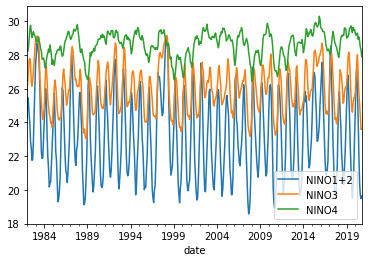

In [7]:
df_enso = pd.read_csv("data/sstenso.txt",sep=" ")

df_enso["date"] = pd.to_datetime(df_enso.YR.astype("str")+'-'+df_enso.MON.astype(str))
df_enso.set_index('date', inplace=True)
df_enso = df_enso[["NINO1+2","NINO3","NINO4"]]
df_enso[["NINO1+2","NINO3","NINO4"]] = df_enso[["NINO1+2","NINO3","NINO4"]].apply(pd.to_numeric,errors="coerce")
df_enso.plot()

## Read Volcanic data

<AxesSubplot:xlabel='date'>

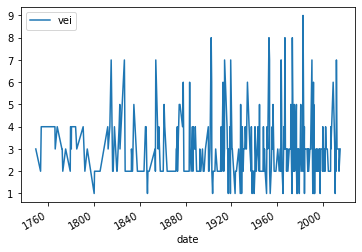

In [8]:
df_vol = pd.read_csv("data/volcano.csv",sep=";")
df_vol = df_vol[~df_vol["Month"].isna()]
df_vol = df_vol[df_vol["Year"]>=1749]

df_vol = df_vol[df_vol["Volcano Explosivity Index (VEI)"] > 0]
df_vol = df_vol.rename(columns={"Volcano Explosivity Index (VEI)":"vei"})
# df_vol["date"] = pd.to_datetime(df_vol.Year.astype(str)+'-'+df_vol.Month.astype(int).astype(str),errors="coerce")
df_vol_group = df_vol.groupby(["Year", "Month"])["vei"].sum().reset_index()
df_vol_group["date"] = pd.to_datetime(df_vol_group.Year.astype(str)+'-'+df_vol_group.Month.astype(int).astype(str))
df_vol_group.set_index("date",inplace=True)
df_vol_group = df_vol_group[["vei"]]
df_vol_group.plot()

# Merge Data

In [9]:
df = df_temp.join(df_amo,how="outer")
df = df.join(df_co2,how="outer")
df = df.join(df_enso,how="outer")
df = df.join(df_nao,how="outer")
df = df.join(df_vol_group,how="outer")
df = df.join(df_ssn,how="outer")
df


,temp,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
date,,,,,,,,,
1749-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...
2020-08-01,NaN,0.438,NaN,19.69,24.42,28.47,0.12,NaN,1.3
2020-09-01,NaN,0.309,NaN,19.48,23.58,28.29,0.98,NaN,0.3
2020-10-01,NaN,0.301,NaN,19.63,23.62,27.89,-0.65,NaN,1.2


In [10]:
#reload_data = False

#data_store = pd.HDFStore('data/processed_data.h5')
#if reload_data:
#    data_store['df'] = df
#else:
#    df = data_store['df']
#data_store.close()


<AxesSubplot:>

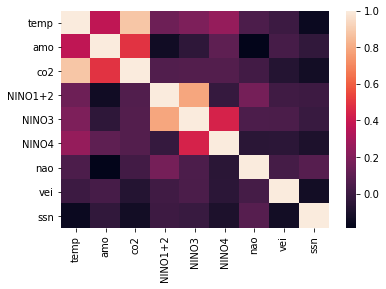

In [11]:
sns.heatmap(df.corr())

# Testing FBprophet

In [12]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
def evaluate(y_pred,y_true, name=""):
    x = np.arange(1,87)
    plt.plot(x, y_true)
    plt.plot(x, y_pred)
    plt.legend(["Y true","Y hat"])
    mae = mean_absolute_error(y_pred, y_true)
    plt.title("{} - MAE: {:0.6f}".format(name,mae))
    plt.show()
    errors = abs(y_pred - y_true)
    print('Model Performance')
    print('RMSE: {:0.6f}'.format(mean_squared_error(y_pred, y_true)))
    print('MAE: {:0.6f}'.format(mae))
    print("Pearson correlation: {:0.6f}".format(pearsonr(y_pred,y_true)[0]))
    print("Correlation coefficient: {:0.6f}".format(abs(1 - pearsonr(y_pred,y_true)[0])))


In [14]:
# import fbprophet
from fbprophet import Prophet
from dateutil.easter import easter

## Vanilla Prophet, using past temperatures to predict future temperature

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


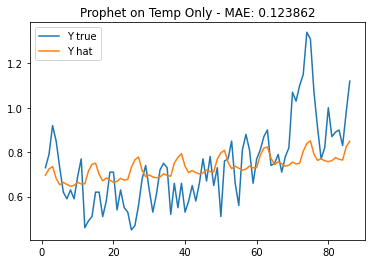

Model Performance
RMSE: 0.025729
MAE: 0.123862
Pearson correlation: 0.587728
Correlation coefficient: 0.412272


In [15]:
# prepare data for vanilla prophet
df_train_vp = df_train[["ds","y"]]
df_test_vp = df_test[["ds","y"]]
m = Prophet()
m.fit(df_train_vp)
forecast = m.predict(df_test_vp.drop(columns="y"))
evaluate(forecast.yhat,df_test_vp.y,"Prophet on Temp Only")

## Multivariate Fbprophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


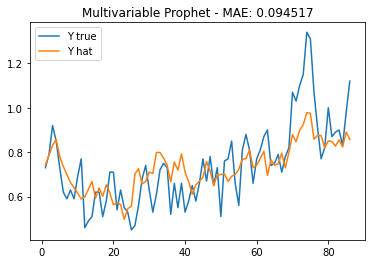

Model Performance
RMSE: 0.014732
MAE: 0.094517
Pearson correlation: 0.791061
Correlation coefficient: 0.208939


In [16]:
# https://github.com/facebook/prophet/issues/792
m = Prophet(weekly_seasonality=True)
m.add_regressor("amo")
m.add_regressor("co2")
m.add_regressor("NINO1+2")
m.add_regressor("NINO3")
m.add_regressor("NINO4")
m.add_regressor("nao")
m.add_regressor("vei")
m.fit(df_train)
forecast = m.predict(df_test.drop(columns="y"))
evaluate(forecast.yhat,df_test.y,"Multivariable Prophet")

## Multivariate Multiplicative fbprophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


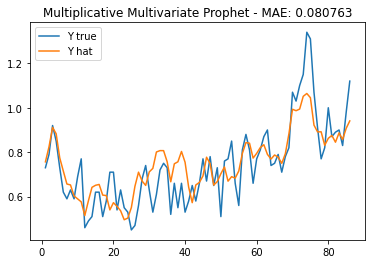

Model Performance
RMSE: 0.010705
MAE: 0.080763
Pearson correlation: 0.837087
Correlation coefficient: 0.162913


In [17]:
m = Prophet(seasonality_mode='multiplicative',weekly_seasonality=True)
# fit the model
m.add_regressor("amo")
m.add_regressor("co2")
m.add_regressor("NINO1+2")
m.add_regressor("NINO3")
m.add_regressor("NINO4")
m.add_regressor("nao")
m.add_regressor("vei")
m.fit(df_copy)

forecast = m.predict(df_test.drop(columns="y"))
evaluate(forecast.yhat,df_test.y,"Multiplicative Multivariate Prophet")

In [18]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'NINO1+2', 'NINO1+2_lower', 'NINO1+2_upper', 'NINO3', 'NINO3_lower',
       'NINO3_upper', 'NINO4', 'NINO4_lower', 'NINO4_upper', 'amo',
       'amo_lower', 'amo_upper', 'co2', 'co2_lower', 'co2_upper',
       'extra_regressors_multiplicative',
       'extra_regressors_multiplicative_lower',
       'extra_regressors_multiplicative_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'nao',
       'nao_lower', 'nao_upper', 'vei', 'vei_lower', 'vei_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'yhat'],
      dtype='object')

# Other models

In [19]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor

In [20]:
from datetime import datetime as dt
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)

df_copy["ds"] = pd.to_datetime(df_copy["ds"])
#df_copy["ds"] = df_copy["ds"].map(dt.toordinal)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]

df_train["ds"] = df_train["ds"].map(dt.toordinal)
df_test["ds"] = df_test["ds"].map(dt.toordinal)

X_train = df_train.drop(['y'], axis=1)
y_train = df_train["y"]
X_test = df_test.drop(['y'], axis=1)
y_test = df_test["y"]

# Parameter optimisation for random forest

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#### Random Forest: Random Search Cross Validation

#Hyperparameters
random_grid = {'n_estimators': [int(x) for x in np.linspace(200, 2000, num = 10)],# Number of trees in random forest
               'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]+[None], # Maximum number of levels in tree
               'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
               'bootstrap': [True, False]} # Method of selecting samples for training each tree

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf , param_distributions = random_grid,
                               n_iter = 50, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   45.4s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

#### Random Forest: Grid search

In [22]:
# Parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [ 8, 10, 12 ],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [ 1500, 1600, 1700]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.5min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [8, 10, 12],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [1500, 1600, 1700]},
             verbose=1)

In [23]:
def model_evaluate(model, X_test, y_test):
    rf_pred = model.predict(X_test)
    errors = abs(rf_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('RMSE: {:0.6f}'.format(mean_squared_error(rf_pred, y_test)))
    print('MAE: {:0.6f}'.format(mean_absolute_error(rf_pred, y_test)))
    print("Pearson correlation: {:0.6f}".format(pearsonr(rf_pred,y_test)[0]))
    print("Correlation coefficient: {:0.6f}".format(abs(1 - pearsonr(rf_pred,y_test)[0])))
    return accuracy

print('Base model')
base_model = RandomForestRegressor()
base_model.fit(X_train, y_train)
base_accuracy = model_evaluate(base_model, X_test, y_test)
print('')

print('Parameter tuned with random search model')
best_random = rf_random.best_estimator_
random_accuracy = model_evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('')

print('Parameter tuned with grid search model')
best_grid = grid_search.best_estimator_
grid_accuracy = model_evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Base model
Model Performance
RMSE: 0.046064
MAE: 0.167715
Pearson correlation: 0.601631
Correlation coefficient: 0.398369

Parameter tuned with random search model
Model Performance
RMSE: 0.047911
MAE: 0.166382
Pearson correlation: 0.581207
Correlation coefficient: 0.418793
Improvement of 0.66%.

Parameter tuned with grid search model
Model Performance
RMSE: 0.048282
MAE: 0.167118
Pearson correlation: 0.586745
Correlation coefficient: 0.413255
Improvement of 0.60%.


## Non-linear models
(code from https://machinelearningmastery.com/how-to-develop-machine-learning-models-for-multivariate-multi-step-air-pollution-time-series-forecasting/)

In [24]:
from sklearn.base import clone
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

def get_models(models=dict()):
	# non-linear models
	models['knn'] = KNeighborsRegressor(n_neighbors=7)
	models['cart'] = DecisionTreeRegressor()
	models['extra'] = ExtraTreeRegressor()
	models['svmr'] = SVR()
	# # ensemble models
	n_trees = 100
	models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
	models['bag'] = BaggingRegressor(n_estimators=n_trees)
	models['rf'] = RandomForestRegressor(n_estimators=n_trees)
	models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
	models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

    

In [25]:
models = get_models()

Defined 9 models


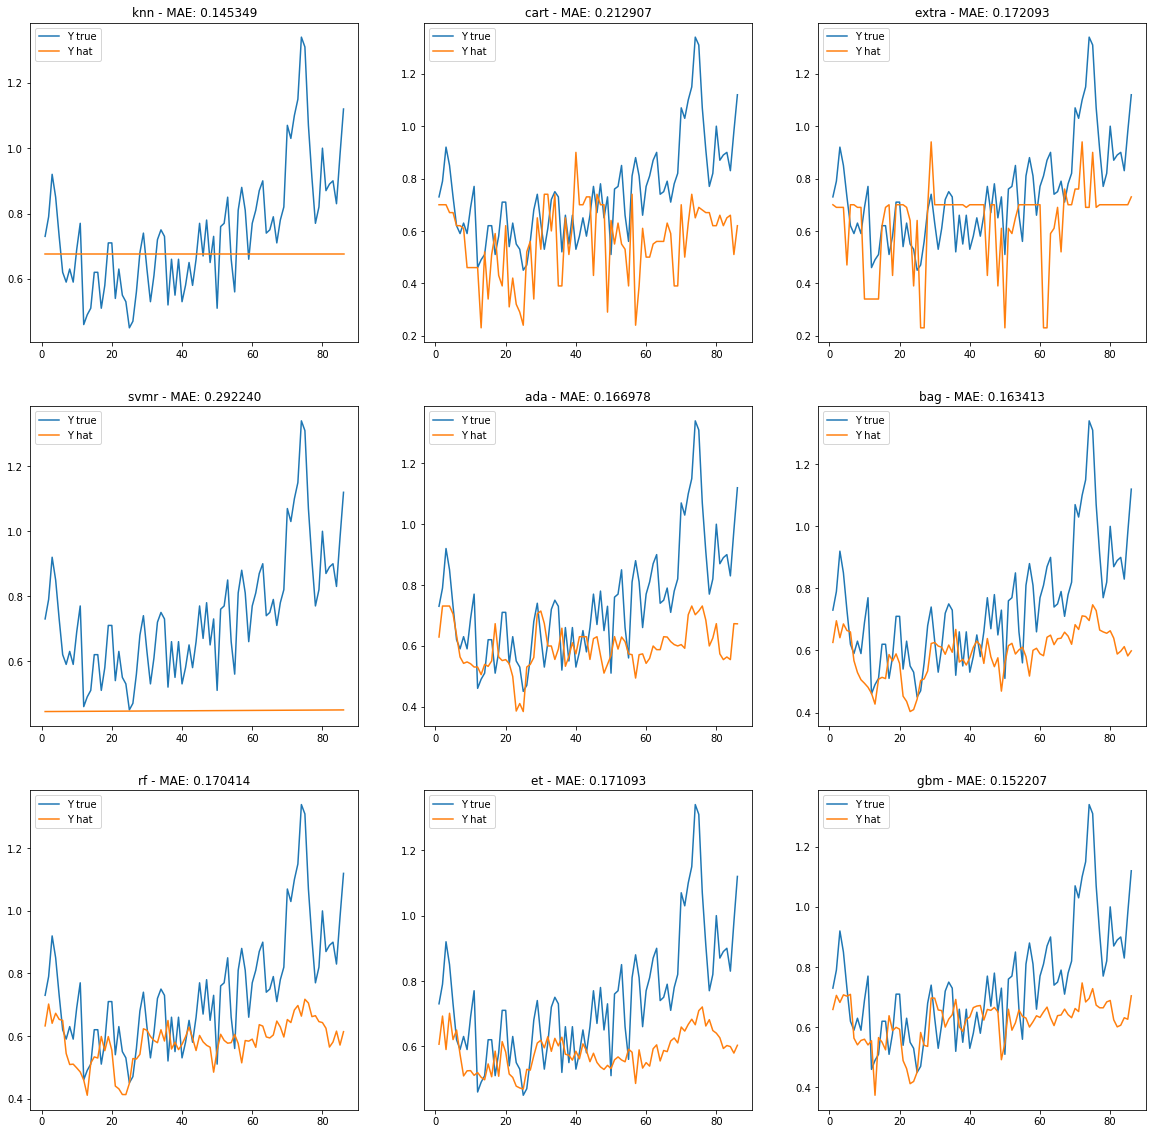

In [26]:
# create a subplot of 9 other models

fig = plt.figure(figsize=[20,20])
i = 0
for name,model in models.items():
    i += 1
    plt.subplot(3, 3, i)
    local_model = clone(model)
    # fit the model
    local_model.fit(X_train, y_train)
    # make prediction
    y_pred = local_model.predict(X_test)
    x = np.arange(1,87)
    plt.plot(x, y_test)
    plt.plot(x, y_pred)
    plt.legend(["Y true","Y hat"])
    mae = mean_absolute_error(y_pred, y_test)
    plt.title("{} - MAE: {:0.6f}".format(name,mae))
    # plt.tight_layout()



## VAR - Vector Auto Regressor

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [27]:
#statsmodels.tsa.vector_ar
from statsmodels.tsa.vector_ar.var_model import VAR

In [28]:
# prepare data here
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]

df_train.set_index("ds",inplace=True)
df_test.set_index("ds",inplace=True)
X_train = df_train.drop(['y'], axis=1)
y_train = df_train["y"]
X_test = df_test.drop(['y'], axis=1)
y_test = df_test["y"]

In [29]:
df_train

,y,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
ds,,,,,,,,,
1984-01-01,0.30,-0.106,343.70,24.18,24.82,27.64,1.66,0.0,6.5
1984-02-01,0.17,-0.088,344.50,25.18,26.22,27.25,0.72,0.0,8.1
1984-03-01,0.29,-0.125,345.28,26.00,27.12,27.21,-0.37,0.0,8.7
1984-04-01,0.09,-0.157,347.07,25.16,27.34,27.70,-0.28,0.0,7.6
1984-05-01,0.33,-0.166,347.43,23.23,26.46,27.95,0.54,0.0,7.0
...,...,...,...,...,...,...,...,...,...
2009-08-01,0.66,0.143,386.08,21.64,25.94,29.21,-0.19,0.0,2.0
2009-09-01,0.68,0.048,384.65,20.82,25.66,29.28,1.51,0.0,2.2
2009-10-01,0.63,0.155,384.33,20.96,25.73,29.65,-1.03,0.0,2.7


In [30]:
model = VAR(endog=df_train)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y, steps=len(df_test))

#result = model_fit.forecast(model_fit.y, steps=len(df_test))
#print(yhat)

prediction

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([[ 6.39196447e-01,  1.08927763e-01,  3.87607753e+02,
         2.31604189e+01,  2.65519177e+01,  2.96570666e+01,
        -3.45791127e-01,  4.14331177e-01,  3.46207946e+00],
       [ 6.65539702e-01,  1.38595746e-01,  3.87642071e+02,
         2.31856746e+01,  2.64969421e+01,  2.96106879e+01,
        -1.12113215e-01,  4.91583856e-01,  3.38087781e+00],
       [ 6.83951210e-01,  1.62538041e-01,  3.87704704e+02,
         2.32433031e+01,  2.64648209e+01,  2.95526305e+01,
        -9.77925043e-02,  4.56604613e-01,  3.33015512e+00],
       [ 6.95488043e-01,  1.82211807e-01,  3.87806067e+02,
         2.33172950e+01,  2.64487008e+01,  2.94906579e+01,
        -1.10790684e-01,  4.19639521e-01,  3.30454029e+00],
       [ 7.03296113e-01,  1.98813404e-01,  3.87933316e+02,
         2.33886423e+01,  2.64425195e+01,  2.94292855e+01,
        -1.24451406e-01,  3.90695534e-01,  3.29608008e+00],
       [ 7.08862340e-01,  2.13141294e-01,  3.88072976e+02,
         2.34425766e+01,  2.64394013e+01,  2.937133

In [31]:
prediction.shape

(86, 9)

In [32]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)
pred

NameError: name 'cols' is not defined

In [ ]:
len(prediction)

In [ ]:
for j in range(0,9):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j].astype(float)

In [ ]:
pred

In [ ]:
pred = pred.apply(pd.to_numeric)

In [ ]:
pred.dtypes

In [ ]:
pred.y

In [ ]:
evaluate(pred.y,df_test_vp.y,"Vector Autoregression")

### Select the Order (P) of VAR model


In [ ]:
aic = []
for i in range(1,30):
    result = model.fit(i)
    aic.append(result.aic)
    #print('Lag Order =', i)
    #print('AIC : ', result.aic)
    #print('BIC : ', result.bic)
    #print('FPE : ', result.fpe)
    #print('HQIC: ', result.hqic, '\n')

plt.plot(aic)

In [ ]:
x = model.select_order(maxlags=30)
x.summary()

## fit model

In [ ]:
model_fit = model.fit(30)
#model_fit.summary()
result = model_fit.forecast(model_fit.y, steps=len(df_test))

In [ ]:
model_fit.plot()
plt.show()

# ARIMA with external regressor

In [ ]:
from pmdarima.arima import auto_arima
def autosarimax(train,train_exog,valid,valid_exog):
    forecast=[]
    model = auto_arima(y= train,
                       trace=True,
                       seasonal = True,
                       stepwise= True,
                       exogenous=train_exog) # Passing external variables

    model.fit(y=train,
              exogenous=train_exog)
        
    forecasted_values = model.predict(n_periods=valid.shape[0],
                      exogenous = valid_exog) # Passing external variables
    
    forecast.append(forecasted_values)
        
    return forecast

forecast_arima = autosarimax(y_train, X_train, y_test, X_test)

# XGBoost

In [ ]:
# import xgboost
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	df = DataFrame(data)
# 	cols = list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg.values

In [ ]:
import xgboost as xgb

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
        verbose=False) # Change verbose to True if you want to see it train

In [ ]:
xgb.plot_importance(reg, height=0.9)

In [ ]:
prediction = reg.predict(X_test)
len(prediction)
prediction.shape

In [ ]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=['y'])
pred

In [ ]:
for i in range(0, len(prediction)):
    pred.iloc[i] = prediction[i].astype(float)
pred

In [ ]:
pred = pred.apply(pd.to_numeric)

In [ ]:
evaluate(pred.y,df_test_vp.y,"XGBoost")